### (Tất cả các tính toán đều được làm bởi Python bên trong Jupyter, phần cuối có export file ra lại dạng excel nhưng chưa modify)

###                                                 Getting things ready

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import geopy.distance
from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm
%matplotlib inline

In [2]:
excel_file = pd.read_excel('GHTK excel.xlsx',sheet_name = 'Data')

In [3]:
excel_file.head()

,Mã đơn,Tháng,Cân nặng đơn hàng (kg),Tỉnh lấy,Miền lấy,Tỉnh giao,Miền giao,Khu vực giao,Loại dịch vụ,Vĩ độ địa chỉ lấy,Kinh độ địa chỉ lấy,Vĩ độ địa chỉ giao,Kinh độ địa chỉ giao,Loại mặt hàng,Trạng thái,Lý do không giao thành công,Loại shop,Giờ lấy hàng thành công,Giờ giao hàng thành công
0,73592,1,1.5,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Nội thành,nhanh,20.977496,105.793996,10.768756,106.687405,Thời trang,Giao không thành công,GHTK quá tải,A,16:41,NaN
1,73597,1,0.1,Hà Nội,Miền Bắc,Bình Thuận,Miền Nam,"Huyện,xã",nhanh,21.046723,105.748431,11.206675,108.629438,Mẹ và bé,Giao không thành công,GHTK quá tải,C,15:17,NaN
2,73600,1,0.3,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Ngoại thành,nhanh,21.027764,105.834160,10.858005,106.688559,Mẹ và bé,Giao không thành công,GHTK quá tải,C,10:46,NaN
3,73603,1,0.4,Hà Nội,Miền Bắc,Hải Phòng,Miền Bắc,Nội thành,chuẩn,20.996087,105.861753,20.865888,106.665975,Mẹ và bé,Giao không thành công,GHTK quá tải,C,17:32,NaN
4,73605,1,0.1,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Nội thành,nhanh,20.988244,105.818238,10.736264,106.671692,Đồ gia dụng,Giao không thành công,GHTK quá tải,C,20:38,NaN


#### Kiểm tra các thông số cơ bản của file

In [4]:
excel_file.shape

(10000, 19)

In [5]:
excel_file.columns

Index(['Mã đơn', 'Tháng', 'Cân nặng đơn hàng (kg)', 'Tỉnh lấy', 'Miền lấy',
       'Tỉnh giao', 'Miền giao', 'Khu vực giao', 'Loại dịch vụ',
       'Vĩ độ địa chỉ lấy', 'Kinh độ địa chỉ lấy', 'Vĩ độ địa chỉ giao',
       'Kinh độ địa chỉ giao', 'Loại mặt hàng', 'Trạng thái',
       'Lý do không giao thành công', 'Loại shop', 'Giờ lấy hàng thành công',
       'Giờ giao hàng thành công'],
      dtype='object')

In [6]:
excel_file.isna().any()

Mã đơn                         False
Tháng                          False
Cân nặng đơn hàng (kg)         False
Tỉnh lấy                       False
Miền lấy                       False
Tỉnh giao                      False
Miền giao                      False
Khu vực giao                   False
Loại dịch vụ                   False
Vĩ độ địa chỉ lấy              False
Kinh độ địa chỉ lấy            False
Vĩ độ địa chỉ giao             False
Kinh độ địa chỉ giao           False
Loại mặt hàng                  False
Trạng thái                     False
Lý do không giao thành công     True
Loại shop                      False
Giờ lấy hàng thành công        False
Giờ giao hàng thành công        True
dtype: bool

In [7]:
dk1 = pd.read_excel('GHTK excel.xlsx',sheet_name = 'biểu phí', skipfooter= 16, skiprows = 5,header= None)
dk1

,0,1,2,3,4,5,6
0,Từ kg trở xuống,3kg,0.5kg,0.5kg,0.5kg,0.5kg,0.5kg
1,Nội thành & Ngoại thành,22000,30000,30000,33000,31000,35000
2,Huyện xã,35000,40000,40000,44000,41000,50000
3,"0,5 kg tiếp theo",2500,5000,5000,10000,5000,10000


In [8]:
dk1 = dk1.rename(columns = {0:'HN,HCM',1:'Nội Tỉnh',2:'Nội Miền',3:'ĐB chuẩn',4:'ĐB nhanh',5:'LM chuẩn',6:'LM nhanh'})

In [9]:
dk1

,"HN,HCM",Nội Tỉnh,Nội Miền,ĐB chuẩn,ĐB nhanh,LM chuẩn,LM nhanh
0,Từ kg trở xuống,3kg,0.5kg,0.5kg,0.5kg,0.5kg,0.5kg
1,Nội thành & Ngoại thành,22000,30000,30000,33000,31000,35000
2,Huyện xã,35000,40000,40000,44000,41000,50000
3,"0,5 kg tiếp theo",2500,5000,5000,10000,5000,10000


In [10]:
dk2 = pd.read_excel('GHTK excel.xlsx',sheet_name = 'biểu phí',header = None,skiprows = 13,skipfooter= 8,usecols = 'A:E')

In [11]:
dk2 = dk2.rename(columns = {0:'Tỉnh khác',1:'Nội Tỉnh',2:'Nội Miền',3:'LM chuẩn',4:'LM nhanh'})

In [12]:
dk2

,Tỉnh khác,Nội Tỉnh,Nội Miền,LM chuẩn,LM nhanh
0,Từ kg trở xuống,3kg,0.5kg,0.5kg,0.5kg
1,Nội thành & Ngoại thành,16500,30000,31000,35000
2,Huyện xã,30000,40000,41000,50000
3,"0,5 kg tiếp theo",2500,5000,5000,10000


In [13]:
excel_file.columns


Index(['Mã đơn', 'Tháng', 'Cân nặng đơn hàng (kg)', 'Tỉnh lấy', 'Miền lấy',
       'Tỉnh giao', 'Miền giao', 'Khu vực giao', 'Loại dịch vụ',
       'Vĩ độ địa chỉ lấy', 'Kinh độ địa chỉ lấy', 'Vĩ độ địa chỉ giao',
       'Kinh độ địa chỉ giao', 'Loại mặt hàng', 'Trạng thái',
       'Lý do không giao thành công', 'Loại shop', 'Giờ lấy hàng thành công',
       'Giờ giao hàng thành công'],
      dtype='object')

In [14]:
excel_file =excel_file.drop(columns = 'Mã đơn')

In [15]:
excel_file['Tỉnh giao'].unique()

array(['TP Hồ Chí Minh', 'Bình Thuận', 'Hải Phòng', 'Bình Dương',
       'Đắk Nông', 'Sóc Trăng', 'Ninh Thuận', 'Quảng Ninh', 'Yên Bái',
       'Bắc Ninh', 'Cần Thơ', 'Tiền Giang', 'Cà Mau', 'Trà Vinh',
       'Hưng Yên', 'Hải Dương', 'Tây Ninh', 'Bắc Giang',
       'Bà Rịa - Vũng Tàu', 'Lai Châu', 'Đồng Nai', 'An Giang', 'Hà Tĩnh',
       'Hà Nội', 'Lào Cai', 'Lạng Sơn', 'Bạc Liêu', 'Đồng Tháp',
       'Bình Phước', 'Tuyên Quang', 'Hà Giang', 'Hậu Giang', 'Lâm Đồng',
       'Thừa Thiên Huế', 'Nghệ An', 'Đắk Lắk', 'Vĩnh Phúc', 'Đà Nẵng',
       'Quảng Bình', 'Ninh Bình', 'Khánh Hòa', 'Phú Thọ', 'Thanh Hóa',
       'Vĩnh Long', 'Quảng Trị', 'Cao Bằng', 'Long An', 'Thái Bình',
       'Nam Định', 'Kiên Giang', 'Bến Tre', 'Thái Nguyên', 'Quảng Ngãi',
       'Hà Nam', 'Bình Định', 'Phú Yên', 'Bắc Kạn'], dtype=object)

In [16]:
excel_file.dtypes

Tháng                            int64
Cân nặng đơn hàng (kg)         float64
Tỉnh lấy                        object
Miền lấy                        object
Tỉnh giao                       object
Miền giao                       object
Khu vực giao                    object
Loại dịch vụ                    object
Vĩ độ địa chỉ lấy              float64
Kinh độ địa chỉ lấy            float64
Vĩ độ địa chỉ giao             float64
Kinh độ địa chỉ giao           float64
Loại mặt hàng                   object
Trạng thái                      object
Lý do không giao thành công     object
Loại shop                       object
Giờ lấy hàng thành công         object
Giờ giao hàng thành công        object
dtype: object

In [17]:
Price = []
bigcity = ['Hà Nội','Đà Nẵng','TP Hồ Chí Minh']
print(excel_file.loc[1,'Tháng'])

1


## 1.Tính Giá Trị Từng Đơn Hàng

In [18]:
Price = []
bigcity = ['Hà Nội','Đà Nẵng','TP Hồ Chí Minh']
for x in range(len(excel_file.index)):
    if excel_file.loc[x,'Tỉnh lấy'] in bigcity:
        #Tinh = Tinh
        if excel_file.loc[x,'Tỉnh giao'] == excel_file.loc[x,'Tỉnh lấy']:
            #Khu vuc giao
            if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                #Weight
                if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 3:
                    Price.append(22000)
                else:
                    Price.append(22000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-3)*2500*2)
            else:
                if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 3:
                    Price.append(35000)
                else:
                    Price.append(35000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-3)*2500*2)
        
        #Mien = Mien
        elif excel_file.loc[x,'Miền giao'] == excel_file.loc[x,'Miền lấy']:
            #dich vu
            if excel_file.loc[x,'Loại dịch vụ'] == 'Chuẩn':
                #Khu vuc giao
                if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                    #Weight
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(30000)
                    else:
                        Price.append(30000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
                else:
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(40000)
                    else:
                        Price.append(40000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
            
            else:
                if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                    #Weight
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(33000)
                    else:
                        Price.append(33000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*10000*2)
                else:
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(44000)
                    else:
                        Price.append(44000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*10000*2)
        
        
        #Lien Mien
        else:
            #dich vu
            if excel_file.loc[x,'Loại dịch vụ'] == 'Chuẩn':
                #Khu vuc giao
                if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                    #Weight
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(31000)
                    else:
                        Price.append(31000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
                else:
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(41000)
                    else:
                        Price.append(41000.08 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
            
            else:
                if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                    #Weight
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(35000)
                    else:
                        Price.append(35000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*10000*2)
                else:
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(50000)
                    else:
                        Price.append(50000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*10000*2)
    
    #Cac tinh khac
    
    else:
        #Tinh = Tinh
        if excel_file.loc[x,'Tỉnh giao'] == excel_file.loc[x,'Tỉnh lấy']:
            #Khu vuc giao
            if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                #Weight
                if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 3:
                    Price.append(16500)
                else:
                    Price.append(16500 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-3)*2500*2)
            else:
                if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 3:
                    Price.append(30000)
                else:
                    Price.append(30000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-3)*2500*2)
        
        #Mien = Mien
        elif excel_file.loc[x,'Miền giao'] == excel_file.loc[x,'Miền lấy']:
            #Khu vuc giao
            if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                #Weight
                if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                    Price.append(30000)
                else:
                    Price.append(30000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
            else:
                if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                    Price.append(40000)
                else:
                    Price.append(40000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
            
        
        
        #Lien Mien
        else:
            #dich vu
            if excel_file.loc[x,'Loại dịch vụ'] == 'Chuẩn':
                #Khu vuc giao
                if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                    #Weight
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(31000)
                    else:
                        Price.append(31000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
                else:
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(41000)
                    else:
                        Price.append(41000.08 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*5000*2)
            
            else:
                if excel_file.loc[x,'Khu vực giao'] in ['Nội thành','Ngoại thành']:
                    #Weight
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(35000)
                    else:
                        Price.append(35000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*10000*2)
                else:
                    if excel_file.loc[x,'Cân nặng đơn hàng (kg)'] <= 0.5:
                        Price.append(50000)
                    else:
                        Price.append(50000 + (excel_file.loc[x,'Cân nặng đơn hàng (kg)']-0.5)*10000*2)
        
    
excel_file
                

,Tháng,Cân nặng đơn hàng (kg),Tỉnh lấy,Miền lấy,Tỉnh giao,Miền giao,Khu vực giao,Loại dịch vụ,Vĩ độ địa chỉ lấy,Kinh độ địa chỉ lấy,Vĩ độ địa chỉ giao,Kinh độ địa chỉ giao,Loại mặt hàng,Trạng thái,Lý do không giao thành công,Loại shop,Giờ lấy hàng thành công,Giờ giao hàng thành công
0,1,1.5,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Nội thành,nhanh,20.977496,105.793996,10.768756,106.687405,Thời trang,Giao không thành công,GHTK quá tải,A,16:41,NaN
1,1,0.1,Hà Nội,Miền Bắc,Bình Thuận,Miền Nam,"Huyện,xã",nhanh,21.046723,105.748431,11.206675,108.629438,Mẹ và bé,Giao không thành công,GHTK quá tải,C,15:17,NaN
2,1,0.3,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Ngoại thành,nhanh,21.027764,105.834160,10.858005,106.688559,Mẹ và bé,Giao không thành công,GHTK quá tải,C,10:46,NaN
3,1,0.4,Hà Nội,Miền Bắc,Hải Phòng,Miền Bắc,Nội thành,chuẩn,20.996087,105.861753,20.865888,106.665975,Mẹ và bé,Giao không thành công,GHTK quá tải,C,17:32,NaN
4,1,0.1,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Nội thành,nhanh,20.988244,105.818238,10.736264,106.671692,Đồ gia dụng,Giao không thành công,GHTK quá tải,C,20:38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12,0.3,Hà Nội,Miền Bắc,Lâm Đồng,Miền Nam,"Huyện,xã",nhanh,21.003610,105.794731,11.494398,107.870235,Ngành khác,Giao thành công,NaN,B,14:05,15:24
9996,12,0.3,Hà Nội,Miền Bắc,Lâm Đồng,Miền Nam,"Huyện,xã",nhanh,21.058783,105.705321,11.551840,107.911706,Mẹ và bé,Giao thành công,NaN,C,17:46,09:20
9997,12,0.3,Hà Nội,Miền Bắc,Quảng Bình,Miền Trung,Ngoại thành,nhanh,21.045496,105.849328,17.620265,106.526000,Thời trang,Giao thành công,NaN,A,21:16,11:52
9998,12,0.5,Lào Cai,Miền Bắc,Vĩnh Phúc,Miền Bắc,"Huyện,xã",chuẩn,22.464010,103.978217,21.253509,105.485898,Đồ gia dụng,Giao thành công,NaN,B,17:49,09:29


In [19]:
len(Price)

10000

In [20]:
excel_file['Phí Ship'] = Price

In [21]:
excel_file.iloc[7500]

Tháng                                        9
Cân nặng đơn hàng (kg)                     0.4
Tỉnh lấy                                Hà Nội
Miền lấy                              Miền Bắc
Tỉnh giao                             Đồng Nai
Miền giao                             Miền Nam
Khu vực giao                         Nội thành
Loại dịch vụ                             nhanh
Vĩ độ địa chỉ lấy                      20.9995
Kinh độ địa chỉ lấy                    105.845
Vĩ độ địa chỉ giao                     11.0686
Kinh độ địa chỉ giao                   107.168
Loại mặt hàng                          Mỹ phẩm
Trạng thái                     Giao thành công
Lý do không giao thành công                NaN
Loại shop                                    A
Giờ lấy hàng thành công                  21:00
Giờ giao hàng thành công                 15:31
Phí Ship                                 35000
Name: 7500, dtype: object

#### 2. Tính Khoảng Cách từ điểm Lấy và điểm giao hàng theo tọa độ

In [22]:
distance = []
for x in range(len(excel_file)):
    takeloc = (excel_file.loc[x,'Vĩ độ địa chỉ lấy'], excel_file.loc[x,'Kinh độ địa chỉ lấy'])
    deliloc = (excel_file.loc[x,'Vĩ độ địa chỉ giao'], excel_file.loc[x,'Kinh độ địa chỉ giao'])
    distance.append(geopy.distance.geodesic(takeloc,deliloc).km)

In [23]:
excel_file['Khoảng cách(km)'] = distance

In [24]:
excel_file

,Tháng,Cân nặng đơn hàng (kg),Tỉnh lấy,Miền lấy,Tỉnh giao,Miền giao,Khu vực giao,Loại dịch vụ,Vĩ độ địa chỉ lấy,Kinh độ địa chỉ lấy,Vĩ độ địa chỉ giao,Kinh độ địa chỉ giao,Loại mặt hàng,Trạng thái,Lý do không giao thành công,Loại shop,Giờ lấy hàng thành công,Giờ giao hàng thành công,Phí Ship,Khoảng cách(km)
0,1,1.5,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Nội thành,nhanh,20.977496,105.793996,10.768756,106.687405,Thời trang,Giao không thành công,GHTK quá tải,A,16:41,NaN,55000.0,1133.729874
1,1,0.1,Hà Nội,Miền Bắc,Bình Thuận,Miền Nam,"Huyện,xã",nhanh,21.046723,105.748431,11.206675,108.629438,Mẹ và bé,Giao không thành công,GHTK quá tải,C,15:17,NaN,50000.0,1131.560477
2,1,0.3,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Ngoại thành,nhanh,21.027764,105.834160,10.858005,106.688559,Mẹ và bé,Giao không thành công,GHTK quá tải,C,10:46,NaN,35000.0,1129.091033
3,1,0.4,Hà Nội,Miền Bắc,Hải Phòng,Miền Bắc,Nội thành,chuẩn,20.996087,105.861753,20.865888,106.665975,Mẹ và bé,Giao không thành công,GHTK quá tải,C,17:32,NaN,33000.0,84.886409
4,1,0.1,Hà Nội,Miền Bắc,TP Hồ Chí Minh,Miền Nam,Nội thành,nhanh,20.988244,105.818238,10.736264,106.671692,Đồ gia dụng,Giao không thành công,GHTK quá tải,C,20:38,NaN,35000.0,1138.146654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12,0.3,Hà Nội,Miền Bắc,Lâm Đồng,Miền Nam,"Huyện,xã",nhanh,21.003610,105.794731,11.494398,107.870235,Ngành khác,Giao thành công,NaN,B,14:05,15:24,50000.0,1075.391660
9996,12,0.3,Hà Nội,Miền Bắc,Lâm Đồng,Miền Nam,"Huyện,xã",nhanh,21.058783,105.705321,11.551840,107.911706,Mẹ và bé,Giao thành công,NaN,C,17:46,09:20,50000.0,1078.102378
9997,12,0.3,Hà Nội,Miền Bắc,Quảng Bình,Miền Trung,Ngoại thành,nhanh,21.045496,105.849328,17.620265,106.526000,Thời trang,Giao thành công,NaN,A,21:16,11:52,35000.0,385.767550
9998,12,0.5,Lào Cai,Miền Bắc,Vĩnh Phúc,Miền Bắc,"Huyện,xã",chuẩn,22.464010,103.978217,21.253509,105.485898,Đồ gia dụng,Giao thành công,NaN,B,17:49,09:29,40000.0,205.549191


## Phần 2: Biểu đồ và nhận xét (Khách hàng, đơn không thành công)

### Phân tích cự li giao hàng và khu vực hoạt động của GHTK:


(-146.2179486672996, 1608.3974353402955)

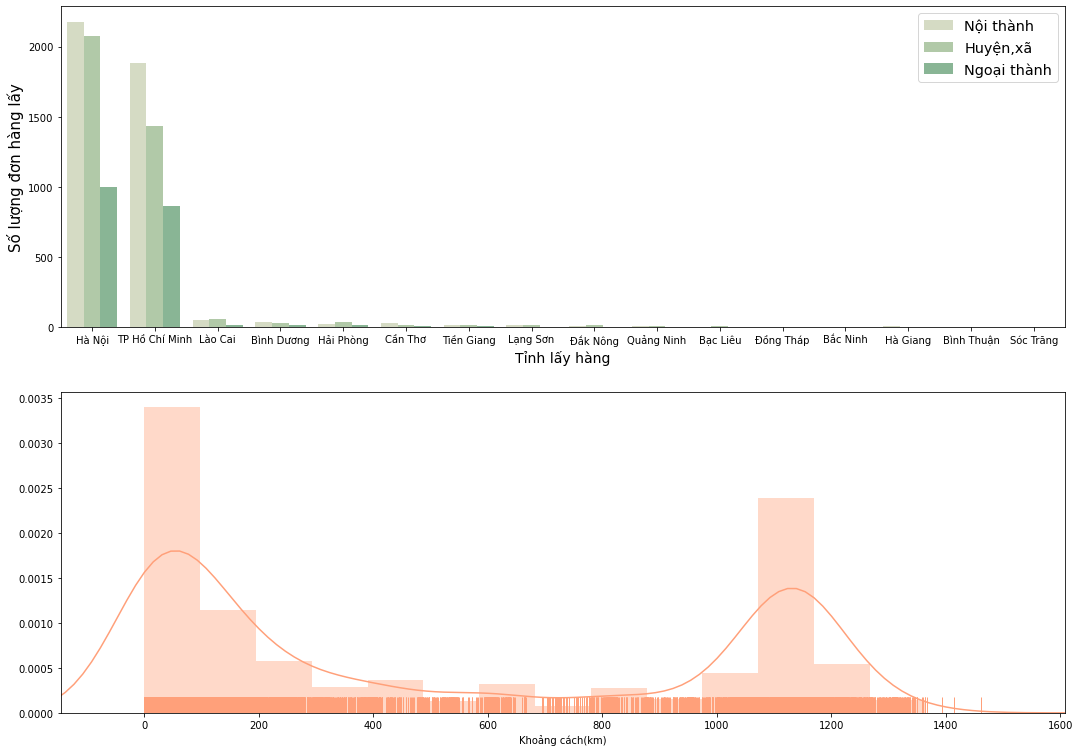

In [25]:
plt.figure(figsize = (18,13))
plt.subplot(2,1,1)
vs2 = sns.countplot(x = 'Tỉnh lấy', data = excel_file,hue='Khu vực giao',order= excel_file['Tỉnh lấy'].value_counts().index,palette = sns.cubehelix_palette(8, start=.5, rot=-.75))
vs2.set_xlabel('Tỉnh lấy hàng',size = 14)
vs2.set_ylabel('Số lượng đơn hàng lấy', size = 15)
vs2.legend(loc = 'upper right',fontsize = 'x-large')
plt.subplot(2,1,2)
vs3 = sns.distplot(excel_file['Khoảng cách(km)'],kde = True, rug= True,color="lightsalmon")
vs3.set_xlim(max(excel_file['Khoảng cách(km)']) * -0.10, max(excel_file['Khoảng cách(km)']) * 1.10)

1)
Hai khu vực hoạt động lấy hàng chính của GHTK là ở TP.HCM và Hà Nội với lượng đơn hàng được giao đến từ khu vực Nội-Ngoại thành chiếm phần lớn so với khu vực Quận-Huyện. Dựa theo biểu đồ phân bố khoảng cách ta có cự li giao hàng chính là vòng ven 2 khu vực chính này (trong khoảng 200km trở lại) và từ TP.HCM đến Hà Nội và ngược lại (Khoảng 1150-1200 theo đường chim bay).

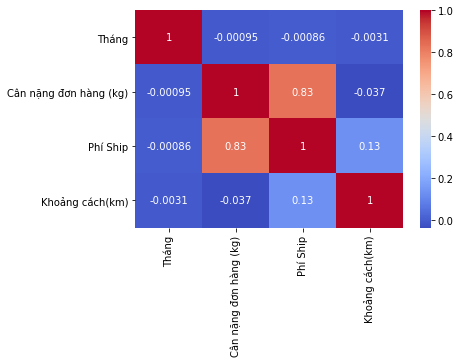

In [26]:
columns_to_keep = ['Tháng','Cân nặng đơn hàng (kg)','Phí Ship','Khoảng cách(km)','Trạng thái','Lý do không giao thành công','Khu vực giao']
okay = excel_file[columns_to_keep].corr()
vs4 = sns.heatmap(data = okay,cmap='coolwarm',annot=True)


<Figure size 2160x2160 with 0 Axes>

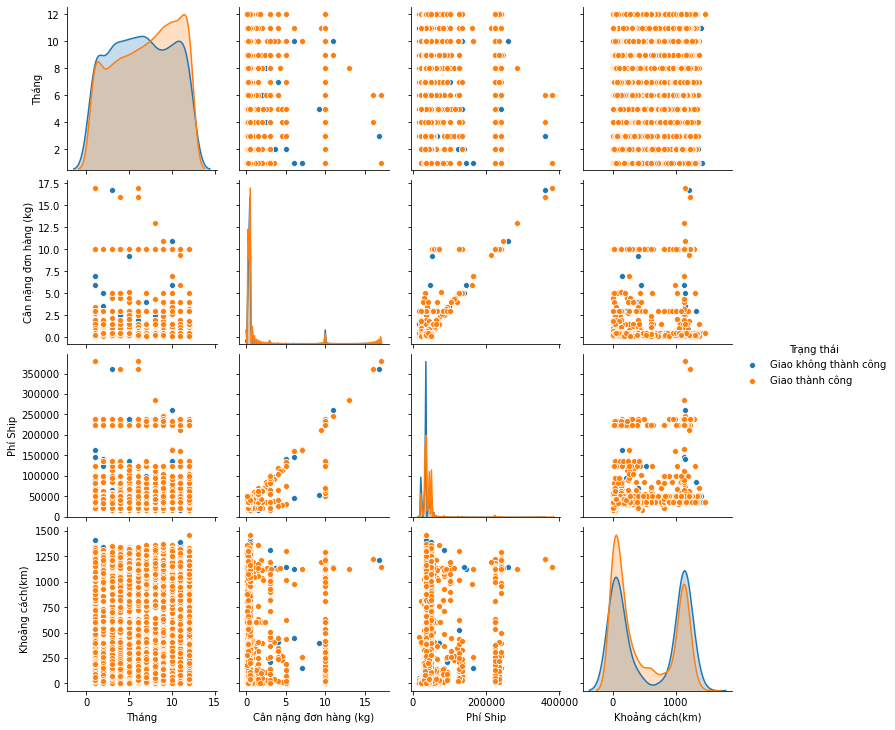

In [27]:
plt.figure(figsize = (30,30))
vs13 = sns.pairplot(excel_file[columns_to_keep], hue = 'Trạng thái')

2) Chúng ta dùng pairplot kết hợp với heatmap để quan sát dữ liệu và tìm mối quan hệ giữa các biến trước khi đi vào phân tích sâu.
Ở đây chúng ta để ý scatterplot giữa Phí Ship và Cân nặng đơn hàng (kg) cũng như Phí ship và khoảng cách (km) thì chúng ta có thể thấy được rằng giữa Khoảng cách (km) và Phí ship mối quan hệ linear là gần như không có (chỉ 0.13 theo như heatmap). Quá trình tính chi phí của GHTK phụ thuộc nặng vào khối lượng của hàng hóa cần giao 0.83 như đã thể hiện.

### Phân tích số lượng phân bố của 'các loại mặt hàng','Cân nặng' 

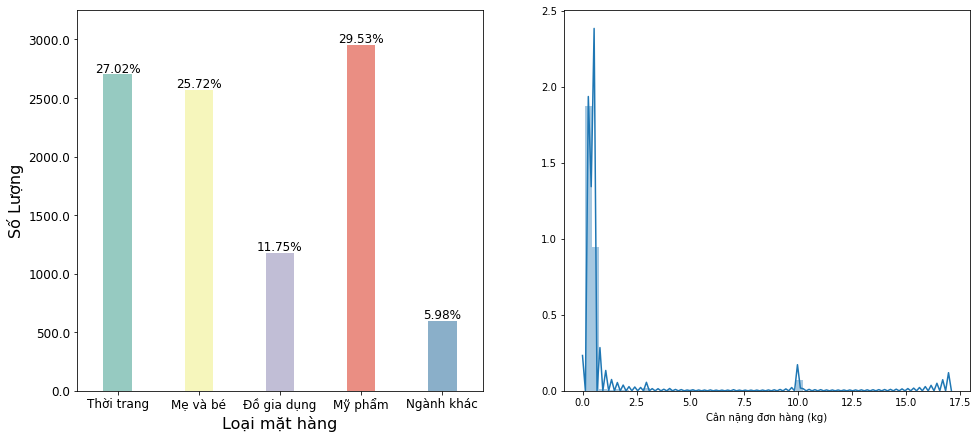

In [28]:
plt.figure(figsize= (16,7))
#vs6 = sns.countplot(y = 'Loại mặt hàng', data = excel_file,facecolor=(0, 0, 0, 0),linewidth=10,edgecolor=sns.color_palette("white", 3))
plt.subplot(1,2,1)
vs6 = sns.countplot(x = 'Loại mặt hàng', data = excel_file, palette = 'Set3')
sizes=[]
total = len(excel_file.index)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(vs6, 0.35)
    #include %

for patch in vs6.patches:
    height = patch.get_height()
    sizes.append(height)
    vs6.text(patch.get_x()+patch.get_width()/2.,
            height + 20,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
vs6.set_ylim(0, max(sizes) * 1.10)
vs6.set_xlabel('Loại mặt hàng', fontdict ={'fontsize': 16,'fontstyle':'normal'} )
vs6.set_xticklabels(labels = list(excel_file['Loại mặt hàng'].unique())  ,fontdict = {'fontsize': 12})
vs6.set_ylabel('Số Lượng', fontdict ={'fontsize': 16,'fontstyle':'normal'} )
vs6.set_yticklabels(labels = vs6.get_yticks().tolist() ,fontdict = {'fontsize': 12})
plt.subplot(1,2,2)
vs6_1 = sns.distplot(excel_file['Cân nặng đơn hàng (kg)'])
vs6

Tại đây chúng ta có thể thấy các mặt hàng chiếm phần lớn đơn hàng của chúng ta là những món hàng có khối lượng- diện tích từ nhỏ đến trung bình nhưng lại có giá trị cao.

In [29]:
for x in list(excel_file['Loại mặt hàng'].unique()):
    print('Cân nặng trung bình của sản phẩm '+x+ ' là:'  ,excel_file[excel_file['Loại mặt hàng'] == x]['Cân nặng đơn hàng (kg)'].mean())


Cân nặng trung bình của sản phẩm Thời trang là: 0.6074759437453661
Cân nặng trung bình của sản phẩm Mẹ và bé là: 0.5905909797822637
Cân nặng trung bình của sản phẩm Đồ gia dụng là: 0.6555744680851058
Cân nặng trung bình của sản phẩm Mỹ phẩm là: 0.6396884524212603
Cân nặng trung bình của sản phẩm Ngành khác là: 0.6886287625418076


In [30]:
excel_file['Trạng thái'].unique()

array(['Giao không thành công', 'Giao thành công'], dtype=object)

In [31]:
failure_ratio =len(excel_file[excel_file['Trạng thái'] == 'Giao không thành công'])/len(excel_file)
print('Tỉ lệ giao hàng không thành công là: ',failure_ratio*100 )

Tỉ lệ giao hàng không thành công là:  19.46


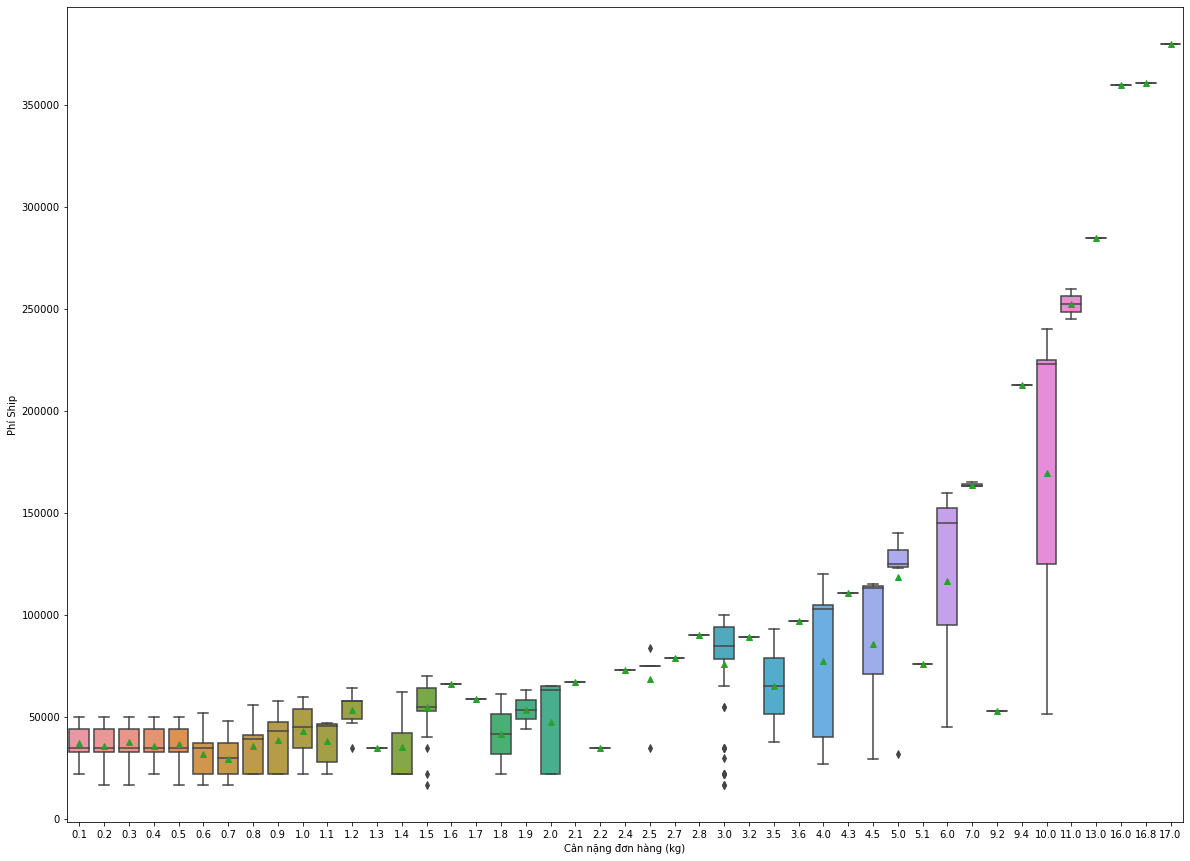

In [32]:
plt.figure(figsize= [20,15])
vs8 = sns.boxplot(x = 'Cân nặng đơn hàng (kg)', y = 'Phí Ship',data= excel_file,showmeans = True)

Tại đây chúng ta có thể thấy được phần lớn phí giao hàng của GHTK không thay đổi quá nhiều và đa số các đơn hàng có khối lượng từ ) đến dưới 3 kg và một lượng đơn hàng vừa ở khoảng 10kg.
Xét theo tính chất các loại hàng hóa đã nêu ở trên (hầu hết nhẹ) thì khối lượng ở khoảng 10kg có thể là những lô hàng ship chẵn.

#### Cân nặng trung bình của các loại mặt hàng: 

Cân nặng của các đơn hàng của từng loại mặt hàng là khoảng 0.62 (kg) khá nhỏ.Lý do là hầu hết các đơn hàng đều thuộc loại sản phẩm có chất liệu nhẹ như (vải vóc, nhựa, bột...) nhưng diện tích thì lại lớn. Điều này cần lưu ý tại vì dù khi chuyên chở lẻ hay số lượng lớn thì số lượng hàng có thể chuyên chở phụ thuộc lớn vào diện tích có thể chưa.

Dễ tưởng tượng hơn là đối với các xe máy chở hàng (phương tiện di chuyển chính) thì số lượng hàng chở được một lần (không tính đến quãng đường di chuyển) của từng đơn hàng sẽ ảnh hưởng mạnh đến tiền lương và động lực của các tài xế. Điều này dẫn đến tình huống (có thể) các tài xế dành nhiều thời gian hơn để lựa hàng và món hàng lớn nhưng nhẹ (ít tiền) thì ít được chọn và được giao chậm hơn (chưa đủ số liệu để chứng minh).

### Phân tích Lý do giao hàng thất bại:

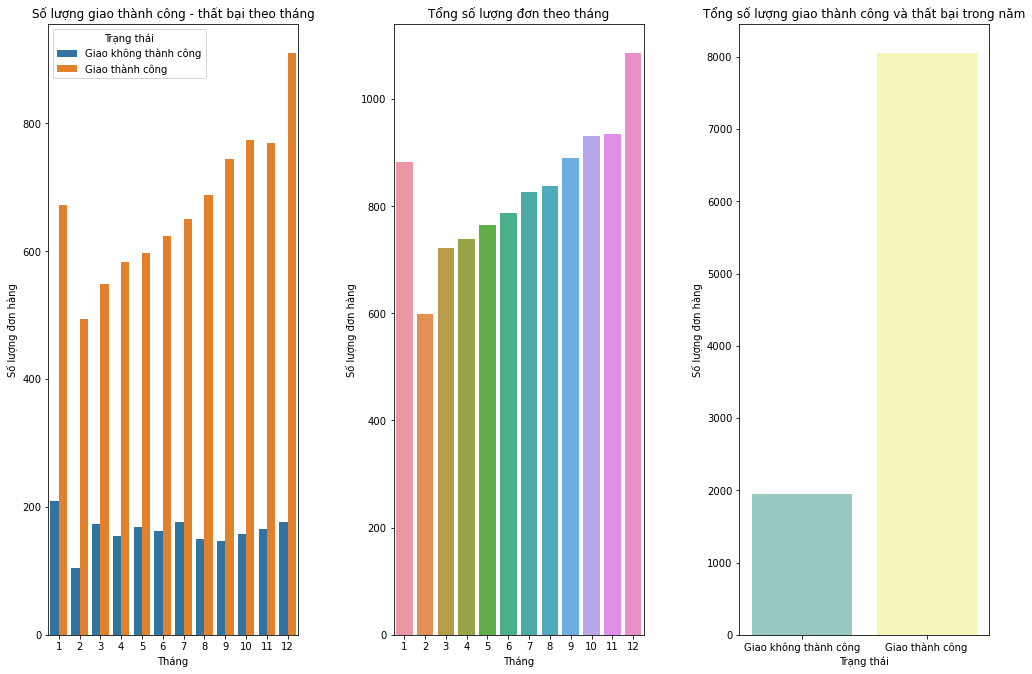

In [33]:
plt.figure('okay',figsize=(15,10))
plt.subplot(1,3,1)
ax1 = sns.countplot(x = 'Tháng',data= excel_file, hue = 'Trạng thái')
ax1.set_ylabel('Số lượng đơn hàng')
ax1.title.set_text('Số lượng giao thành công - thất bại theo tháng')
plt.subplot(1,3,2)
ax2 = sns.countplot(x = 'Tháng',data= excel_file)
ax2.set_ylabel('Số lượng đơn hàng')
ax2.title.set_text('Tổng số lượng đơn theo tháng')
plt.subplot(1,3,3)
vs7 = sns.countplot(x =  'Trạng thái',data = excel_file, palette = 'Set3')
vs7.set_ylabel('Số lượng đơn hàng')
vs7.title.set_text('Tổng số lượng giao thành công và thất bại trong năm')
plt.tight_layout(3.0) 

Ở đây chúng ta kiểm tra số lượng đơn hàng từng tháng và tỉ lệ giao hàng không thành công theo thời gian. Vì ở đây chỉ có dữ liệu của 1 năm nên chúng ta chưa thể kết luận seasonal trend và chưa để đi vào phân tích seasonal trend. 
Ở đây chúng ta thấy số lượng đơn hàng giao không thành công của từng tháng có thay đổi rất nhỏ dù cho số lượng tăng trưởng ở đơn hàng.

In [34]:
for x in range(len(excel_file['Lý do không giao thành công'].unique())):
    if type(excel_file['Lý do không giao thành công'].unique()[x]) != np.float: 
        print('Các lý do khiến giao hàng thất bại là ',str(x+1),excel_file['Lý do không giao thành công'].unique()[x])
        

Các lý do khiến giao hàng thất bại là  1 GHTK quá tải
Các lý do khiến giao hàng thất bại là  2 Khách không ưng, từ chối nhận hàng
Các lý do khiến giao hàng thất bại là  3 Không liên lạc được với khách 3 lần
Các lý do khiến giao hàng thất bại là  4 Sai địa chỉ giao
Các lý do khiến giao hàng thất bại là  5 Shop huỷ đơn


#### Đi sâu vào phân tích lý do giao hàng thất bại, các đặc tính:

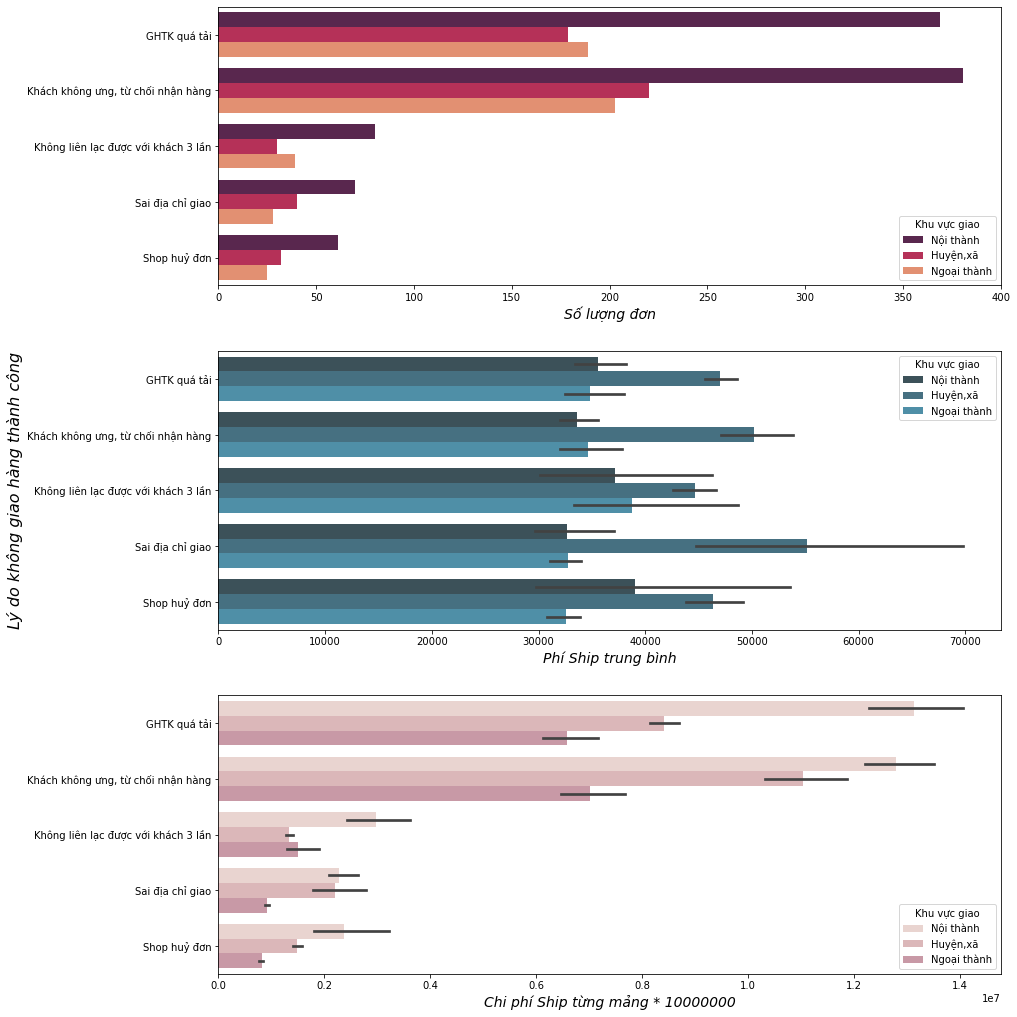

In [35]:
from pylab import rcParams
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (14,14))
rcParams['figure.figsize'] = 12, 7
#first
vs10 = sns.countplot(y = 'Lý do không giao thành công',data = excel_file,palette="rocket", hue= 'Khu vực giao', ax =axes[0])
vs10.set_xlabel('Số lượng đơn', size = 14,fontdict ={'fontstyle':'italic'})
vs10.set_ylabel(None)
#second
vs11 = sns.barplot(y = 'Lý do không giao thành công',x = 'Phí Ship',data = excel_file,palette=sns.color_palette("GnBu_d"), hue= 'Khu vực giao', ax =axes[1])
vs11.set_xlabel('Phí Ship trung bình', size = 14,fontdict ={'fontstyle':'italic'})
vs11.set_ylabel('Lý do không giao hàng thành công', size = 16,fontdict ={'fontstyle':'italic'} )
#third
vs12 = sns.barplot(y = 'Lý do không giao thành công',x = 'Phí Ship',data = excel_file,palette=sns.cubehelix_palette(8), hue= 'Khu vực giao', ax =axes[2],estimator = sum)
vs12.set_xlabel('Chi phí Ship từng mảng * 10000000', size = 14,fontdict ={'fontstyle':'italic'})
vs12.set_ylabel(None)
plt.tight_layout(0.25)



Chúng ta có thể thấy rằng 2 lý do chính dẫn đến việc giao hàng thất bại là GHTK quá tải và khách hàng không ưng ý với món hàng. Vì quy trình của GHTK là nhận tiền sau khi giao hàng thành công, vì thế nên số lượng hàng giao thất bại sẽ là số lượng tổn thất về Phí Ship.
##### Chi phí tổn thất được tính: 

In [36]:
print('Tổng chi phí tổng thất là: ',str(excel_file[excel_file['Lý do không giao thành công'].isna() == False]['Phí Ship'].sum())
     , '/' +str(excel_file['Phí Ship'].sum())) 
print('Theo phần trăm: ', str((excel_file[excel_file['Lý do không giao thành công'].isna() == False]['Phí Ship'].sum())/(excel_file['Phí Ship'].sum()*100)) + ' %')

Tổng chi phí tổng thất là:  74904000.0 /407919000.0
Theo phần trăm:  0.001836246901958477 %


Như vậy việc giao hàng thất bại đã dẫn đến tổng số lỗ lên đến gần 75tr tức 18% trên tổng hơn 400tr gross profit.
Từ chi phí ship trung bình giữa huyện-xã và nội-ngoại thành cộng thêm % tổng Phí Ship chúng ta có thể thấy được mặc dù Chi phí Ship ở cận thành rẻ hơn so với quận-huyện nhưng tỉ lễ giao hàng thất bại vì quá tải thì cao hơn nhiều.


In [37]:
labels = list(excel_file['Loại dịch vụ'].unique())
size = excel_file

### Phân tích dữ liệu loại dịch vụ (Khoảng cách, phí Ship)

Text(0, 0.5, 'Cân nặng (km)')

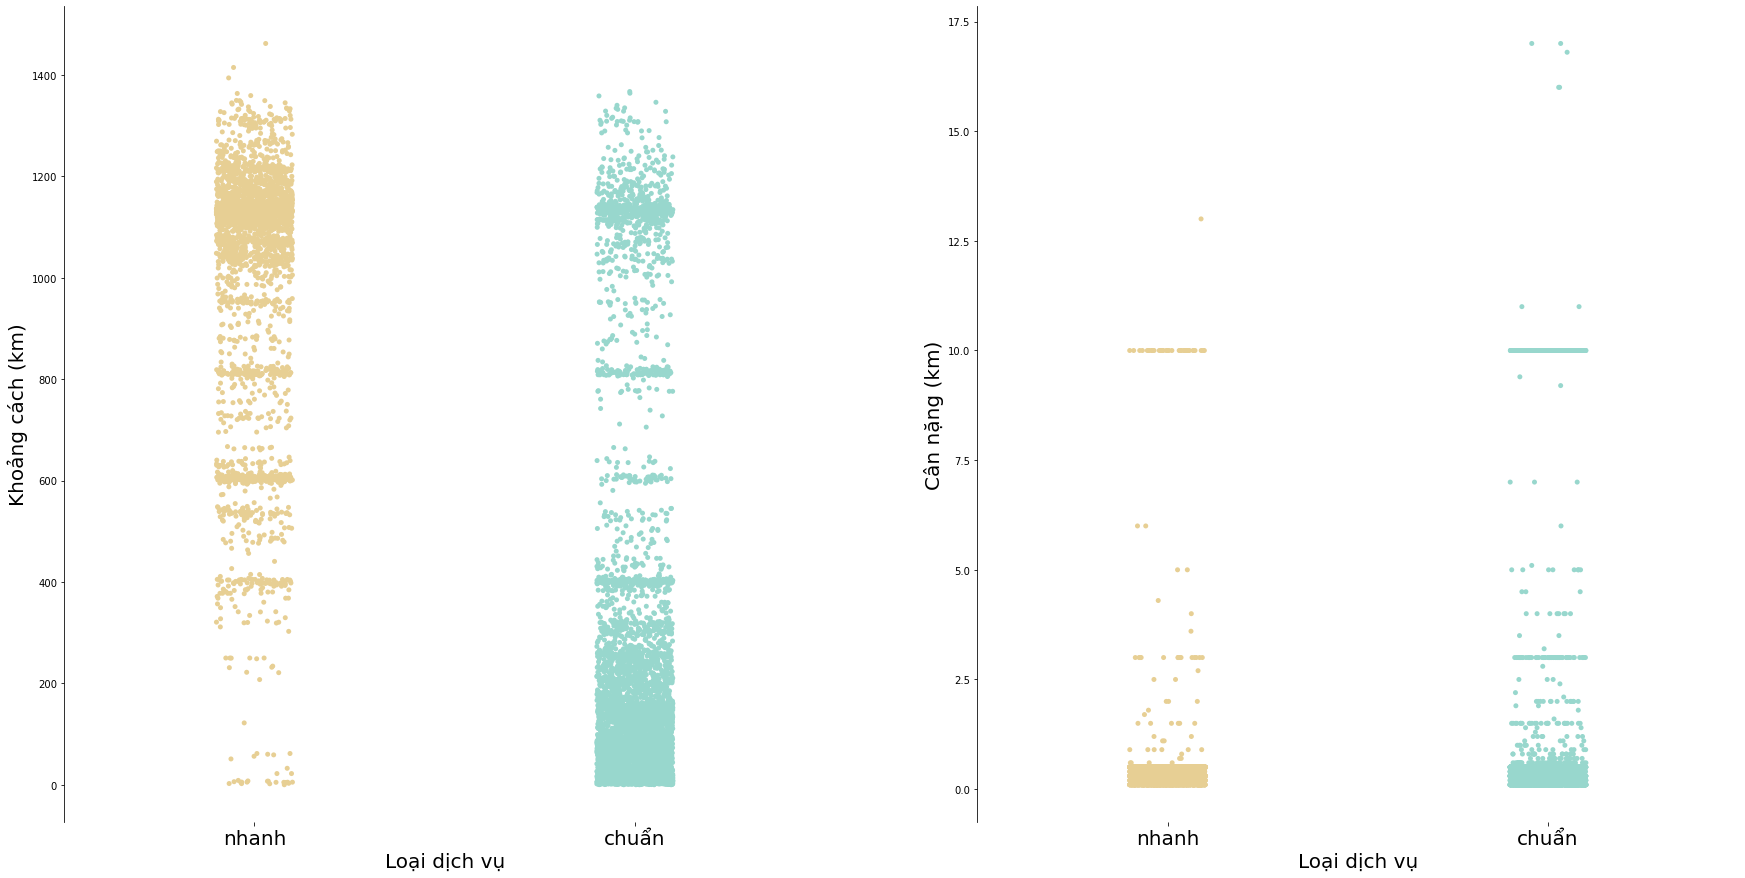

In [38]:
fig, axes = plt.subplots(nrows= 1 ,ncols =2,figsize = (30,15))
vs16 = sns.stripplot(x = 'Loại dịch vụ', y = 'Khoảng cách(km)', data = excel_file, palette ='BrBG', ax = axes[0])
vs16.spines['right'].set_visible(False)
vs16.spines['top'].set_visible(False)
vs16.spines['bottom'].set_visible(False)
vs16.set_xlabel('Loại dịch vụ', size = 20)
vs16.set_xticklabels(labels = ['nhanh','chuẩn'], size = 20)
vs16.set_ylabel('Khoảng cách (km)', size = 20)

vs17 = sns.stripplot(x = 'Loại dịch vụ', y = 'Cân nặng đơn hàng (kg)', data = excel_file, palette ='BrBG', ax = axes[1])
vs17.spines['right'].set_visible(False)
vs17.spines['top'].set_visible(False)
vs17.spines['bottom'].set_visible(False)
vs17.set_xlabel('Loại dịch vụ', size = 20)
vs17.set_xticklabels(labels = ['nhanh','chuẩn'], size = 20)
vs17.set_ylabel('Cân nặng (km)', size = 20)

Từ quan hệ giữa khoảng cách và loại dịch vụ chúng ta có thể thấy được 2 xu hướng trong 2 loại dịch vụ NHANH và CHUẨN là:
dịch vụ nhanh thường được sử dụng hơn với khoảng cách giao hàng xa (trong khoảng từ khu vực TP.HCM đến khu vực Hà Nội) trong khi dịch vụ chuẩn thì lại tập trung ở khoảng cách giao hàng ngắn hơn 300km.

#### Chia vùng khoảng cách để phân tích

In [39]:
cator = []

for x in range(len(excel_file)):
    if excel_file.loc[x,'Khoảng cách(km)'] >= 1000:
        cator += ['Trên 1000(km)']
    elif excel_file.loc[x,'Khoảng cách(km)'] < 400:
        cator += ['dưới 400(km)']
    else:
        cator += ['1000> x > 400(km)']
        
    

In [40]:
excel_file['Phân Khúc'] = cator

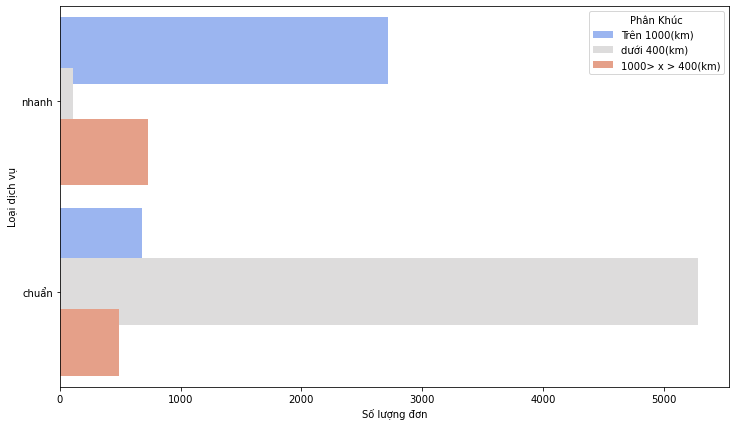

In [41]:
#plt.figure(figsize = (7,5))
vs18 = sns.countplot(y = 'Loại dịch vụ', data = excel_file, palette = 'coolwarm',hue = 'Phân Khúc')
vs18.set_xlabel('Số lượng đơn')
def change_height(ax, new_value) :
    for patch in ax.patches :
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .5)
change_height(vs18, 0.35)

Biểu đồ phân tích này cho thấy rằng đa số đơn hàng chuẩn được giao trong phạm vi dưới 400 (Km) tức là trong phạm vi khu vực chính quanh Tp.HCM và Hà Nội. Khách hàng chỉ sử dụng dịch vụ nhanh khi giao hàng xa.

## Kết luận các vấn đề

+ hai khu vực chính hoạt động nhận đơn hàng là TP. HCM và Hà Nội ngoài ra những khu vực khác số lượng vô cùng ít và chưa có, có thể là do GHTK chưa được biết đến nhiều ở những nơi này.
+ Phí giao hàng phụ thuộc nặng nề lên cân nặng của món hàng nhưng hầu hết các đơn hàng đều có khối lượng nhẹ nhưng giá trị lớn trong khi đó diện tích của món hàng chưa được đề cập, đây là khó khăn với các tài xế xe máy.
+ Tỉ lệ giao hàng không thành công vô cùng cao với 2 lý do chính là khách hàng không ưng ý món hàng và do GHTK quá tải, chúng ta sẽ tập trung vào những điểm có thể kiểm soát được đó là GHTK quá tải.
+ Phần lớn đơn hàng ship trong cự ly gần (<400km) nơi mà chi phí rẻ dùng giao hàng loại chuẩn và hầu hết khách hàng dùng dịch vụ nhanh đều ship hàng đi với khoảng cách xa (từ HCM đến Hà Nội).

### Một số các đề xuất về thay đổi

+ Chiến lực giá nên thay đổi để trở nên phụ thuộc hơn cả về diện tích món hàng.
+ Có thể thay đổi quy định về cân nặng tối đa đối với các món hàng được giao trong phạm vị nhỏ hơn 400km để trở nên tối ưu hơn khi: giao hàng chế độ NHANH (nhiều ưu đãi hơn), giao hàng trong phạm vi xa (liên miền). VD cơ bản tăng giá giao gần và giảm giá khi giao xa.
+ Đồng thời tăng độ ảnh hưởng của GHTK đến các doanh nghiệp nhỏ vừa, hoạt động trong các phạm vi khác ngoài TP HCM và Hà Nội. (như Đà Nẵng)
+ Cải thiện sự quá tải của GHTK (cần thêm thông tin)


### Các Khó khăn trong việc phân tích thông tin

#### Thông tin để phân tích còn thiếu những chi tiết như:
+ thời gian chính xác món hàng được nhận, giao
+ Lợi nhuận (grossprofit - % của nhân viên giao hàng)
+ Các loại mặt hàng
+ Sample size còn nhỏ 
+ Mốc thời gian chỉ có 1 năm, chưa đủ thông tin để nhận biết seasonal trend

#### Nhận xét cá nhân về giao hàng tiết kiệm:
dịch vụ còn chưa phát triển ở khu vực miền trung như Đà Nẵng... 

### Xuất bản ra Excel (chưa modify)

In [42]:
excel_file.to_excel(excel_writer = 'new GHTK.xlsx',sheet_name='Sheet_name_1')